In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
file_path='boston (1).csv'
boston_data=pd.read_csv(file_path)
# Display the first few rows of the dataset and some basic statistics
boston_data_head = boston_data.head()
boston_data_description = boston_data.describe()

boston_data_head, boston_data_description

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
 1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
 2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
 3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
 4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
 
    PTRATIO       B  LSTAT  MEDV  
 0     15.3  396.90   4.98  24.0  
 1     17.8  396.90   9.14  21.6  
 2     17.8  392.83   4.03  34.7  
 3     18.7  394.63   2.94  33.4  
 4     18.7  396.90   5.33  36.2  ,
              CRIM          ZN       INDUS        CHAS         NOX          RM  \
 count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
 mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
 std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
 min      0.006

CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s

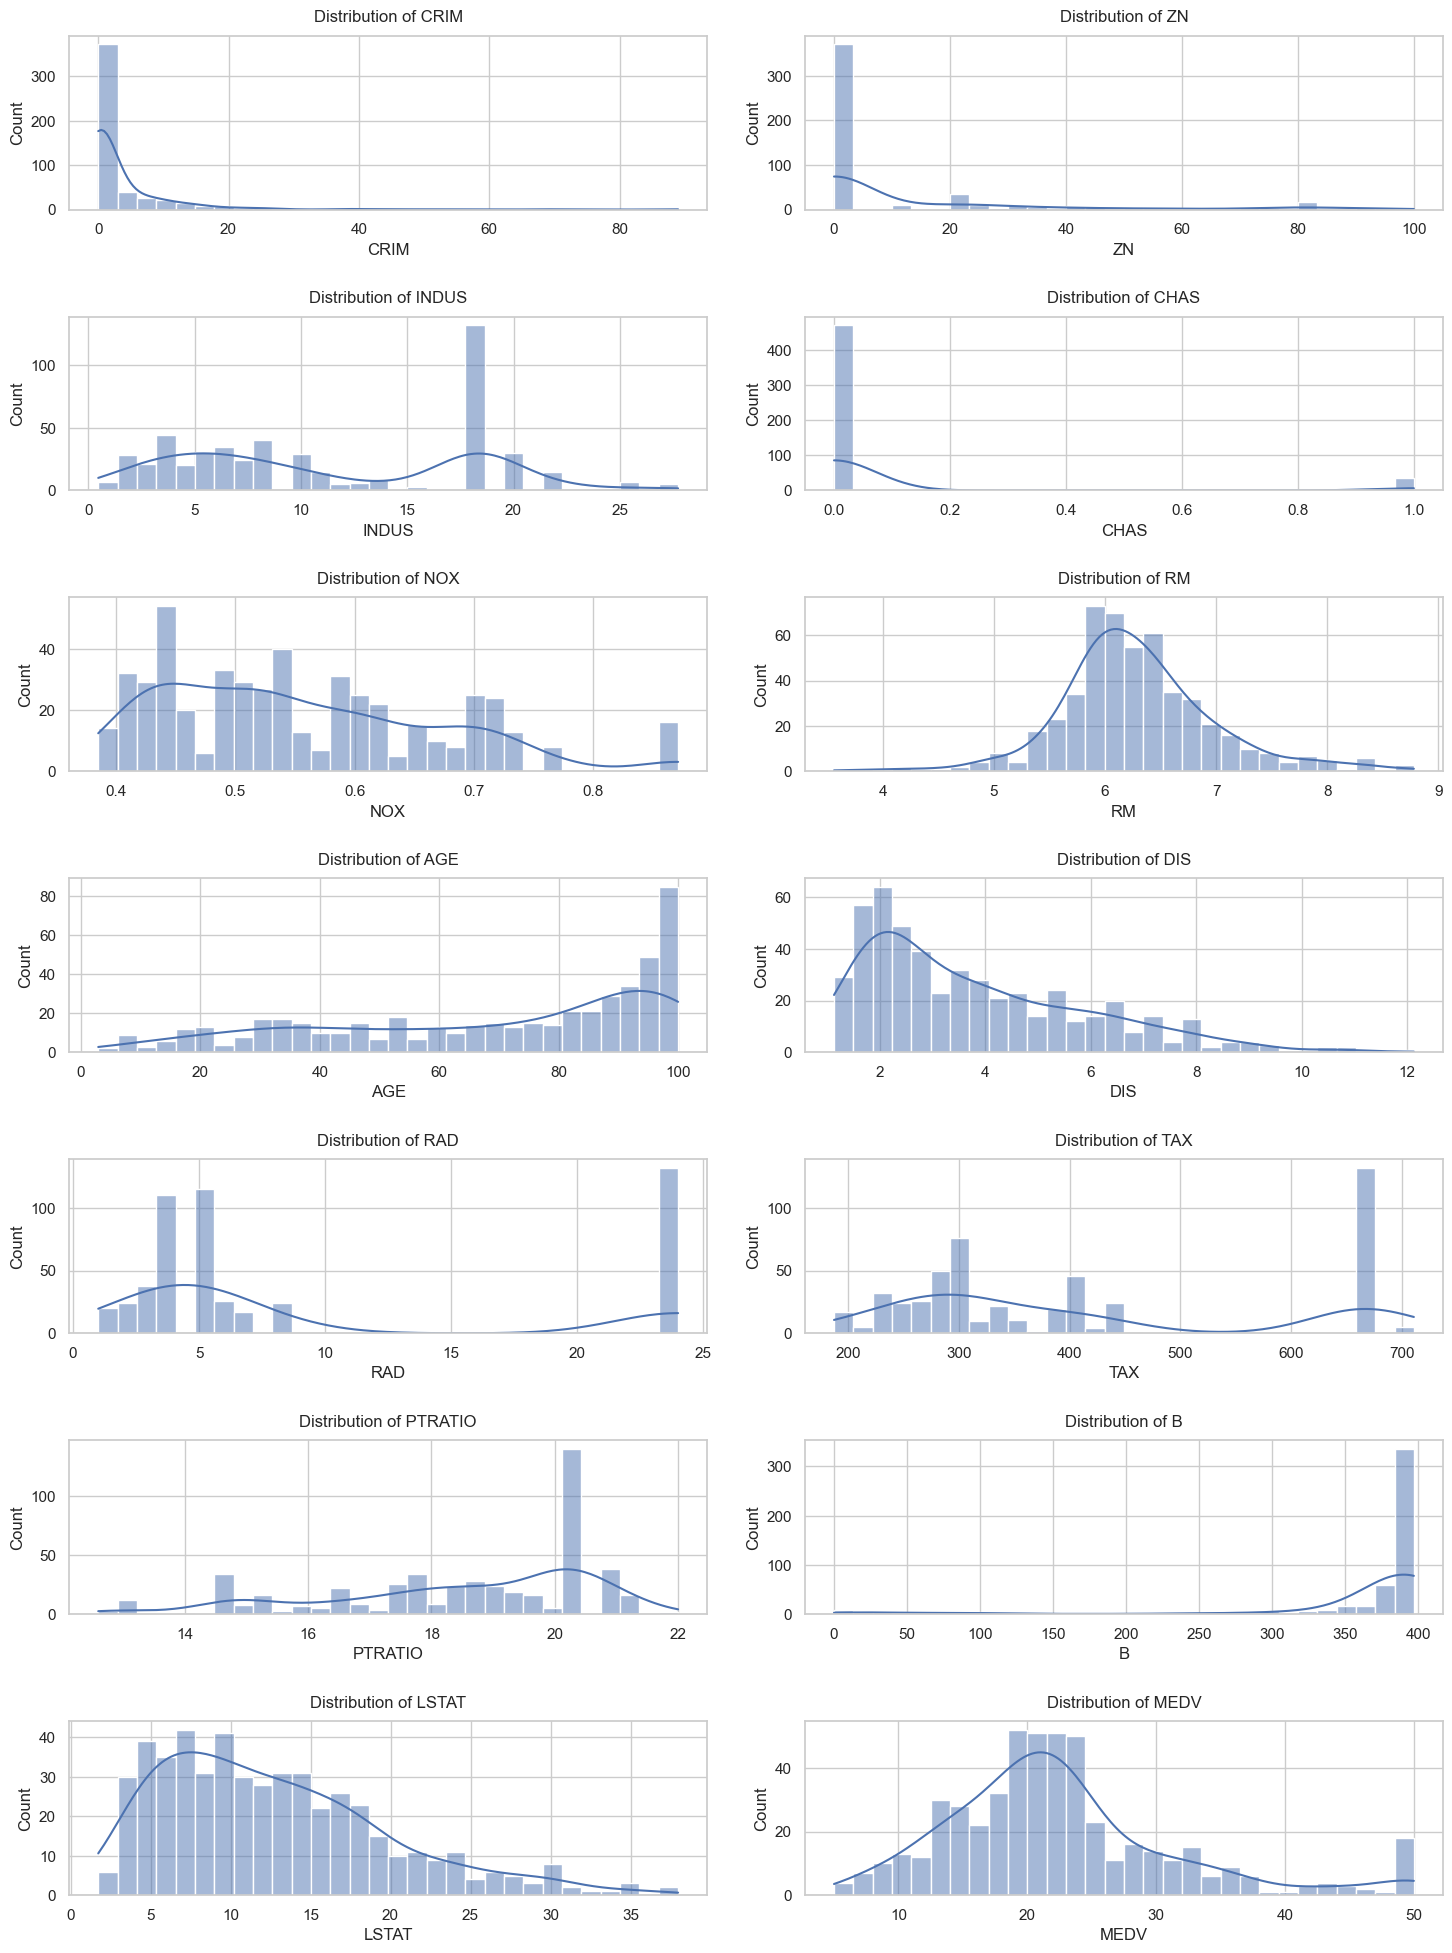

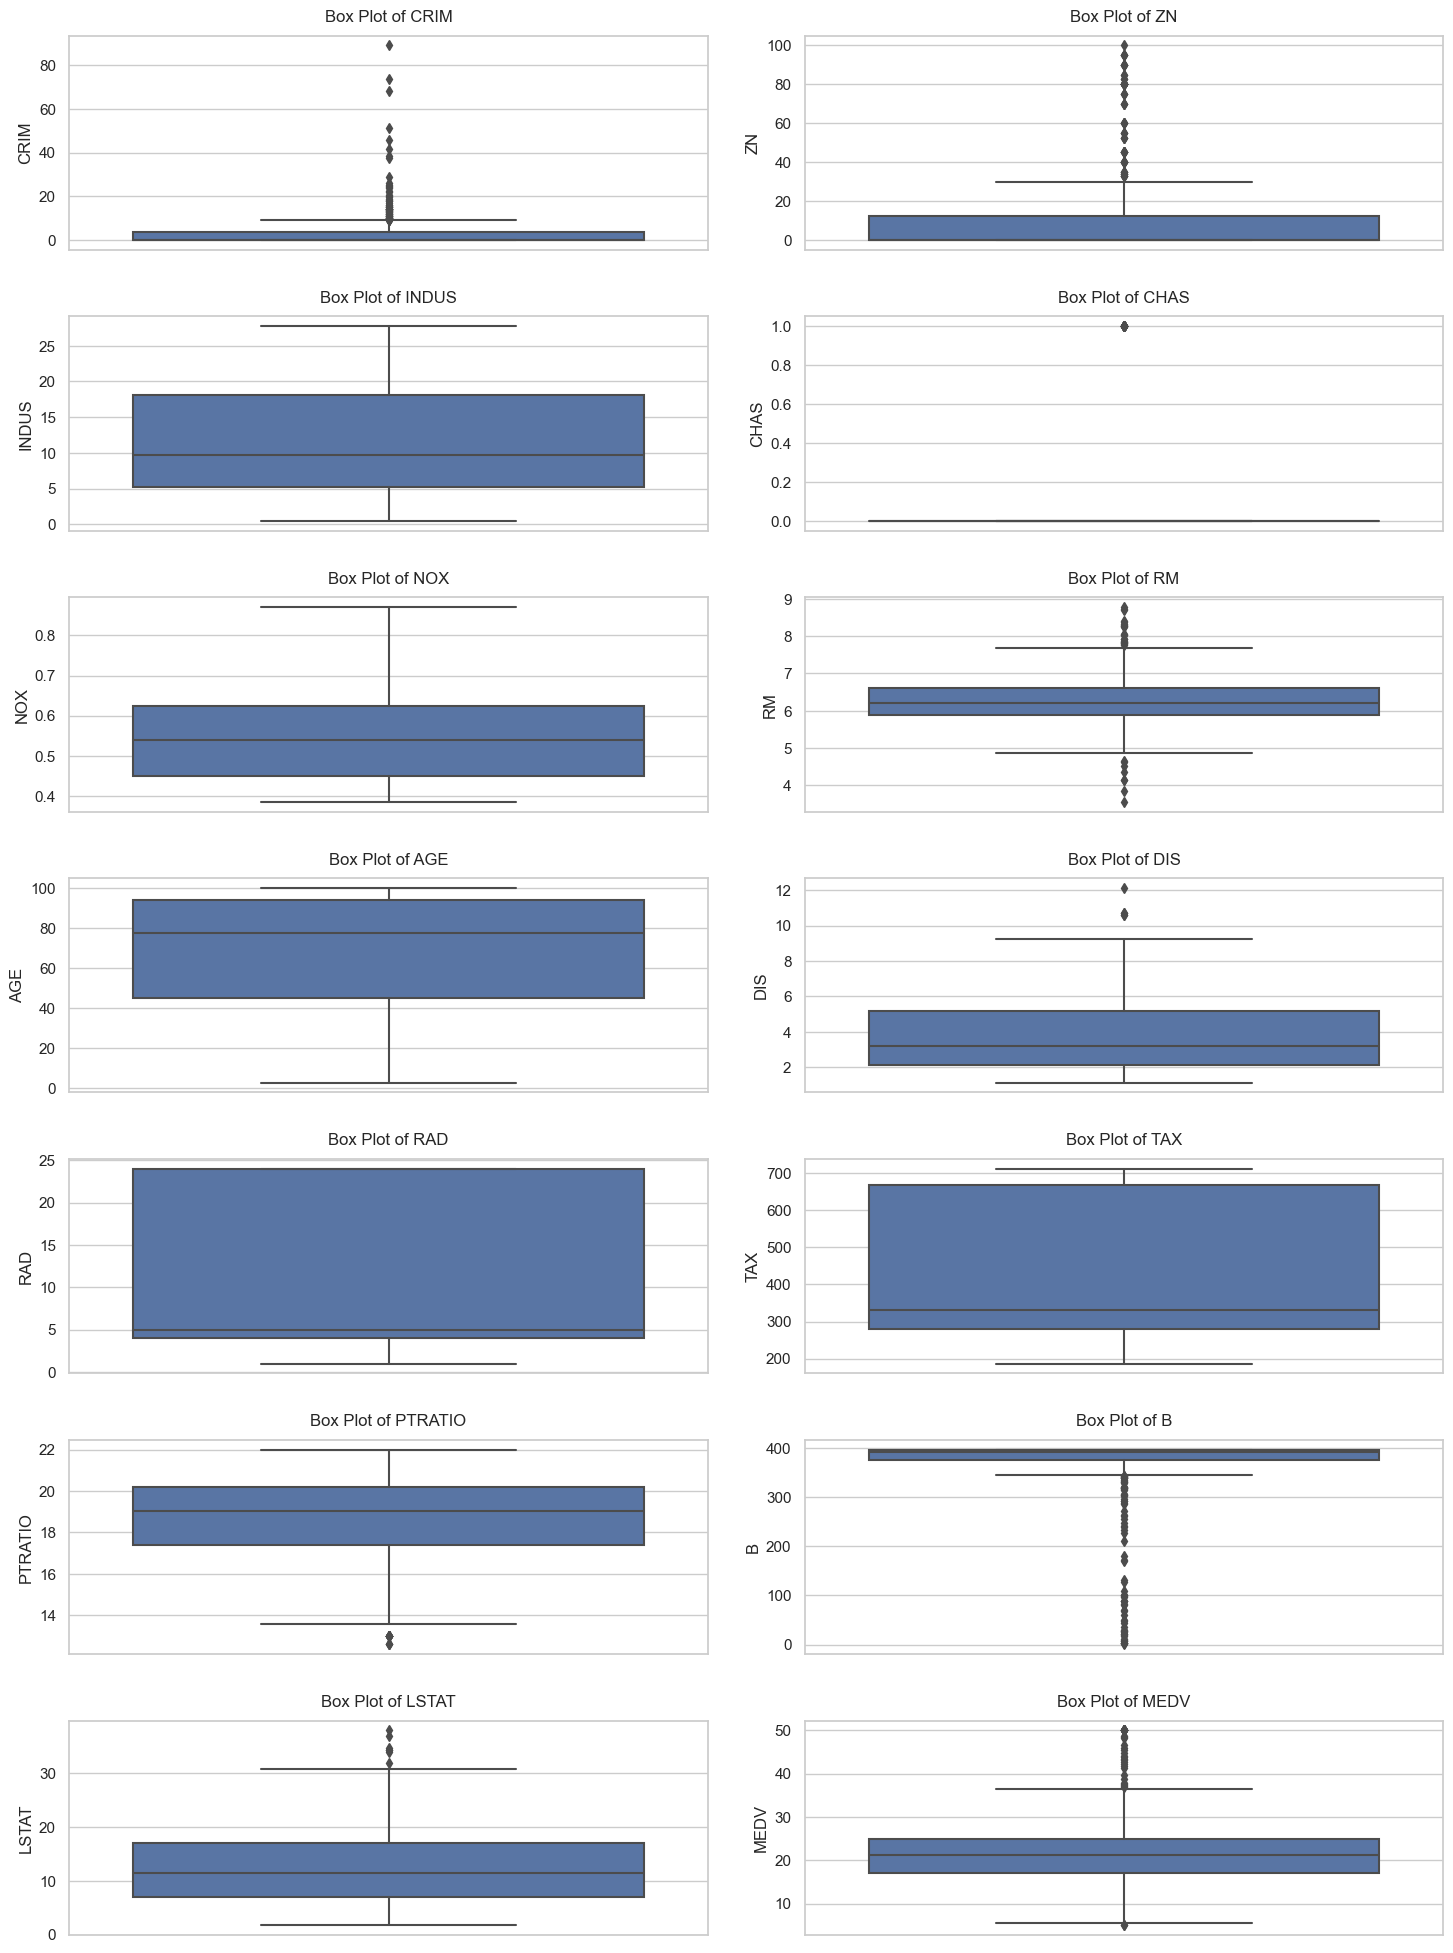

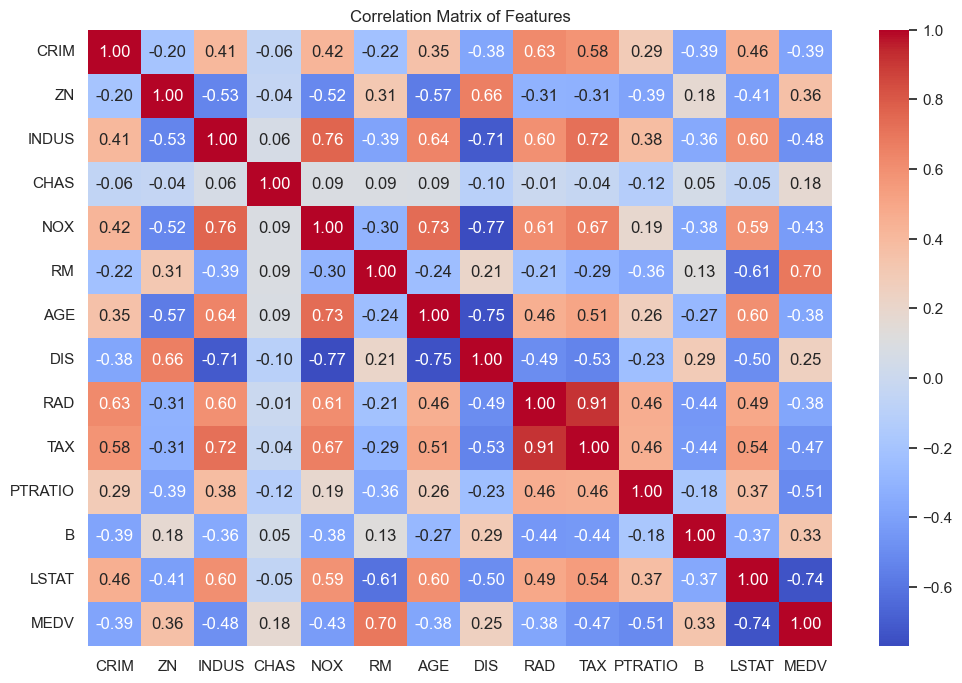

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Data Exploration: Distribution of each feature and the target variable
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(15, 20))
axs = axs.flatten()
index = 0

for k, v in boston_data.items():
    sns.histplot(v, ax=axs[index], kde=True, bins=30)
    axs[index].set_title(f'Distribution of {k}', pad=10)
    index += 1

plt.tight_layout(pad=2)
plt.show()

# Checking for missing values
missing_values = boston_data.isnull().sum()

# Outliers Identification: Box plot for each feature
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(15, 20))
axs = axs.flatten()
index = 0

for k, v in boston_data.items():
    sns.boxplot(y=k, data=boston_data, ax=axs[index])
    axs[index].set_title(f'Box Plot of {k}', pad=10)
    index += 1

plt.tight_layout(pad=2)
plt.show()

# Correlation Analysis
correlation_matrix = boston_data.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Show missing values
missing_values


Data Exploration: The distribution plots for each feature and the target variable (MEDV) show diverse distributions. Some features like CRIM, ZN, and B are heavily skewed, while others like RM have a more symmetric distribution. MEDV, our target variable, appears roughly normally distributed but with a spike at the higher value end.

Missing Values: The dataset does not have any missing values in any of the columns, which simplifies the preprocessing steps.

Outliers Identification: The box plots reveal the presence of outliers in several features, such as CRIM, ZN, RM, B, PTRATIO, and LSTAT. These outliers can potentially affect the performance of a linear regression model.

Correlation Analysis: The heatmap of the correlation matrix shows varying degrees of correlation between the features and the target variable MEDV. For example, RM (average number of rooms per dwelling) shows a strong positive correlation with MEDV, indicating that houses with more rooms tend to have higher values. LSTAT (percentage of lower status population) shows a strong negative correlation with MEDV. This suggests that in areas with a higher lower-status population, the median value of homes is lower.

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculating VIF for each feature in the dataset
vif_data = pd.DataFrame()
vif_data["feature"] = boston_data.columns
vif_data["VIF"] = [variance_inflation_factor(boston_data.values, i) for i in range(len(boston_data.columns))]

vif_data.sort_values(by="VIF", ascending=False)


,feature,VIF
5,RM,136.101743
10,PTRATIO,87.227233
4,NOX,74.004269
9,TAX,61.939713
13,MEDV,24.503206
6,AGE,21.398863
11,B,21.351015
7,DIS,15.430455
8,RAD,15.369980
2,INDUS,14.485874


Investigating multicollinearity is crucial in regression analysis, as high correlation between predictors can make it difficult to determine the individual effect of each predictor on the dependent variable. Here's how we can further investigate multicollinearity:

Variance Inflation Factor (VIF) Analysis: This is a common method to quantify the level of multicollinearity. A VIF value greater than 10 is often considered indicative of high multicollinearity.

Let's start by calculating the Variance Inflation Factor (VIF) for each feature in the dataset. This will help us quantify the extent of multicollinearity.

Variance Inflation Factor (VIF) Analysis
The Variance Inflation Factor (VIF) for each feature is calculated, and the results are as follows:

Several features have high VIF values, suggesting significant multicollinearity. Notably:
RM (Average number of rooms per dwelling): VIF = 136.1
PTRATIO (Pupil-teacher ratio by town): VIF = 87.2
NOX (Nitric oxide concentration): VIF = 74.0
TAX (Full-value property tax rate): VIF = 61.9
Other features like AGE, B, DIS, RAD, INDUS, and LSTAT also show high VIF values.
Interpretation and Recommendations:
High VIF Values: The high VIF values for these features indicate that they have strong linear relationships with other predictors in the dataset. This can make it difficult to determine their individual impact on the target variable, MEDV.

Dealing with Multicollinearity:

Removing Features: Consider removing one or more of the highly collinear features. For example, if TAX and RAD are highly correlated, you might choose to keep only one of them.

In [6]:
# Removing the variables 'RAD' and 'NOX' from the dataset
reduced_boston_data = boston_data.drop(['RAD', 'NOX'], axis=1)

# Displaying the first few rows of the updated dataset
reduced_boston_data.head()


,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


removing one or more of the highly collinear features
RAD (Index of accessibility to radial highways) and TAX (Full-value property tax rate): These have a very high correlation. We might choose to remove one of them. Typically, TAX is more directly related to the value of the house, so we might consider removing RAD.

NOX (Nitric oxide concentration) and INDUS (Proportion of non-retail business acres): Both are indicators of industrial presence. We could remove one, potentially NOX, as it's more of an environmental factor, whereas INDUS directly relates to the type of area (residential vs. non-residential).

AGE (Proportion of owner-occupied units built before 1940) and NOX: Since we're already considering removing NOX, this might resolve the multicollinearity in this pair.

DIS (Weighted distances to five Boston employment centers) and NOX: The decision to remove NOX would also address the multicollinearity here.

After removing these variables, we would be left with a dataset that's less prone to multicollinearity issues. Let's proceed with removing RAD and NOX from the dataset.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Separating the features and the target variable
X = reduced_boston_data.drop('MEDV', axis=1)
y = reduced_boston_data['MEDV']

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Applying Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = lin_reg.predict(X_test)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2


(5.192730890542549, 0.6323051540564206)

Standardizing the data is a good practice, especially when using linear regression, as it ensures that each feature contributes equally to the prediction. This process involves scaling the features so they have a mean of 0 and a standard deviation of 1.

After standardizing the data, we'll apply a linear regression algorithm to predict the target variable, MEDV (Median value of owner-occupied homes).

Let's proceed with these steps:

Standardize the Features: Except for the target variable MEDV, all other features will be standardized.
Apply Linear Regression: We'll then fit a linear regression model to this standardized data and evaluate its performance.
First, I'll standardize the features.

Linear Regression Model Evaluation
The linear regression model has been trained and evaluated on the standardized dataset. Here are the performance metrics:

Root Mean Squared Error (RMSE): 5.19

This metric indicates the model's prediction error. A lower RMSE is better, and in this context, an RMSE of 5.19 means that the average error in predicting the median value of homes is approximately $5,190.
R-squared (R²) Score: 0.63

This metric represents the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² of 0.63 means that about 63% of the variability in MEDV can be explained by the model.
Interpretation
The R² score suggests that the model has a moderate level of predictive power. While it can explain a significant portion of the variance in house prices, there is still room for improvement.
The RMSE indicates the typical prediction error, which, given the context of housing prices, is a relatively moderate value.